# Aviation Exploration [placeholder title]

## Goals

#### Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [1]:
# All imports
# reminder to add ignore warning code at the end

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data

In [2]:
# Open data file

# Had to specify encoding 'latin-1' for file to load
# Setting low_memory=False in the read_csv function will force pandas to read the entire file at once, 
# which can help with inferring the correct data types. 

ad = pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)

### Initial Exploration

In [3]:
# Get initial info

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
ad['Total.Minor.Injuries'].head()

0    0.0
1    0.0
2    NaN
3    0.0
4    NaN
Name: Total.Minor.Injuries, dtype: float64

In [5]:
ad.sample(n=10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
6842,20001214X45174,Accident,NYC84FA032A,1983-11-18,"STOCKHOLM, NJ",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,1.0,0.0,0.0,VMC,Cruise,Probable Cause,NaN
61452,20061106X01606,Accident,NYC06LA228,2006-09-22,"Orient, ME",United States,45.789166,-67.8175,NaN,NaN,...,Personal,NaN,NaN,NaN,2.0,NaN,VMC,Climb,Probable Cause,30-08-2007
78780,20160815X33452,Accident,GAA16CA428,2016-08-12,"Reno, NV",United States,004085N,0119443W,NaN,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's failure to see and avoid fence pos...,25-09-2020
58910,20050706X00944,Accident,DFW05CA172,2005-06-22,"GRAHAM, TX",United States,32.9,-98.533333,NaN,NaN,...,Aerial Application,NaN,NaN,1.0,NaN,NaN,VMC,Maneuvering,Probable Cause,13-09-2005
80120,20170627X31135,Accident,WPR17FA134,2017-06-27,"Arlington, AZ",United States,331346N,0112540W,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,NaN,The inflight overstress separation of the vert...,25-09-2020
52380,20020411X00500,Accident,ATL02FA076B,2002-04-06,"LAKELAND, FL",United States,27.9925,-82.019723,LAL,Lakeland-Linder Regional,...,Personal,NaN,NaN,NaN,NaN,3.0,VMC,Landing,Probable Cause,26-08-2003
26991,20001212X24703,Accident,SEA91LA016,1990-11-14,"BRIGHAM CITY, UT",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,2.0,0.0,0.0,VMC,Takeoff,Probable Cause,23-11-1992
30137,20001211X14393,Accident,CHI92LA121,1992-04-04,"OSAGE BEACH, MO",United States,NaN,NaN,K15,GRAND GLAZE,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,23-07-1993
44032,20001211X10143,Accident,LAX98LA178,1998-05-31,"INYOKERN, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,VMC,Takeoff,Probable Cause,03-08-1999
56039,20040105X00011,Accident,ATL04LA062,2003-12-26,"ATLANTA, GA",United States,33.871945,-84.311667,PDK,DEKALB-PEACHTREE,...,Instructional,NaN,NaN,NaN,NaN,1.0,VMC,Landing,Probable Cause,07-07-2005


Initial observations:

- 88888 rows and 31 columns
- 5 floats and 26 objects
- Column specifics denoted by a '.' followed by specification ('Airport.Code' & 'Airport.Name')
- Columns that may need to be adjusted to different dtype
    - Accident.Number -> int or float
    - Event.Date -> date type
    - Publication.Date -> date type
- Columns that will need capitalization adjusted
    - Location
    - Air.carrier
    - 

In [6]:
# Assess the na

ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [7]:
# Assess missingness by percentage

ad.isna().sum()/len(ad)*100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

#### Initial thoughts

- Might be able to create subset of injuries into one column
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
- Drop missing rows from
    - Location
    - Country
    - Make
    - Model
    - Amateur.Built
    - Injury.Severity
- Columns to drop that do not contribute to insights regarding aircrafts 
    - Latitude
    - Longitude
    - Airport.Code & Airport.Name
        - Cound include in Next Steps (which airports to focus on and pull separate data on that)
    - Schedule
    - Purpose.of.flight (is this something that can be helpful for next stage of business development?)
- Create subset analysis
    - Weather.Condition (how do aircrafts wheather in harsh conditions?)

##### Explore columns before deciding how to handle
- Aircraft.Category
- Registration.Number
- Number.of.Engins
- Engin.Type
- FAR.Description
- Schedule
- Air.Carrier
- Broad.phase.of.flight
- Report.Status
- Publication.Date (vs Event.Date which has 0 na)

#### Exploration of Column Values

In [8]:
# Non unique to the event!!!

ad['Event.Id'].value_counts()

20001212X19172    3
20001214X45071    3
20220730105623    2
20051213X01965    2
20001212X16765    2
                 ..
20001211X14216    1
20001211X14239    1
20001211X14207    1
20001211X14204    1
20221230106513    1
Name: Event.Id, Length: 87951, dtype: int64

In [9]:
# Change dtype to date
# Compare to publication date

ad['Event.Date'].value_counts()

1984-06-30    25
1982-05-16    25
2000-07-08    25
1983-08-05    24
1984-08-25    24
              ..
2014-03-16     1
2014-03-15     1
2014-03-12     1
2014-03-10     1
2022-12-29     1
Name: Event.Date, Length: 14782, dtype: int64

In [10]:
# Relevant to analysis --> Keep 

""" 

An accident is when damage is done to an aircraft or person whereas 
an incident is an event the could have caused an accident.


"""

ad['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [11]:
# More than one record can have the same accident number with different details
# Maybe get rid of duplicates

ad['Accident.Number'].value_counts()

CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
             ..
LAX92FA065    1
ANC92T#A12    1
MIA92LA049    1
NYC92LA048    1
ERA23LA097    1
Name: Accident.Number, Length: 88863, dtype: int64

In [12]:
# Adjust capitalization & drop na rows

ad['Location'].value_counts()

ANCHORAGE, AK          434
MIAMI, FL              200
ALBUQUERQUE, NM        196
HOUSTON, TX            193
CHICAGO, IL            184
                      ... 
Corona De Tucso, AZ      1
Lithonia, GA             1
BONANZA, OR              1
NEWPORT, PA              1
Brasnorte,               1
Name: Location, Length: 27758, dtype: int64

In [13]:
# Adjust capitalization & trim to get rid of numbers at the end

# Since the other columns with injury severity metrics are missing
# so much data, we can focus on this column for analysis
# and suggest we get a more complete data base to assess number 
# of injuries for phase 2 of business development

ad['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [14]:
# Can imputate and na to 'Unknown' & adjust capitalization --> Keep
# Redistribute 'Unknowns' based on proportions of other categories

ad['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [15]:
# Can imputate and na to 'Unknown' & adjust capitalization --> Keep
# then can distribute unknown
ad['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [16]:
# Lowercase all letters

ad['Make'].value_counts()

Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: Make, Length: 8237, dtype: int64

In [17]:
# Not relevant for analysis --> Drop

ad['Registration.Number'].value_counts()

NONE      344
UNREG     126
None       65
UNK        13
USAF        9
         ... 
N93478      1
N519UA      1
N8840W      1
N21040      1
N9026P      1
Name: Registration.Number, Length: 79105, dtype: int64

In [18]:
# Needed for analysis --> Keep
# Missing ~7% of data
# Distribute na values based on probabily distribution of existing values

ad['Number.of.Engines'].value_counts(normalize=True)

1.0    0.840312
2.0    0.133796
0.0    0.014806
3.0    0.005833
4.0    0.005205
8.0    0.000036
6.0    0.000012
Name: Number.of.Engines, dtype: float64

In [19]:
# Adjust capitalization
# Missing ~8% of data

# Unknown, None, NONE, UNK

ad['Engine.Type'].value_counts(normalize=True)

Reciprocating      0.849875
Turbo Shaft        0.044113
Turbo Prop         0.041449
Turbo Fan          0.030326
Unknown            0.025070
Turbo Jet          0.008593
None               0.000232
Geared Turbofan    0.000147
Electric           0.000122
LR                 0.000024
NONE               0.000024
Hybrid Rocket      0.000012
UNK                0.000012
Name: Engine.Type, dtype: float64

In [20]:
# Too many na values and not enough significance for analysis --> Drop

ad['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [21]:
# Not relevant to analysis --> Drop

ad['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [22]:
# Can imputate and na to 'Unknown' & adjust capitalization --> Keep

ad['Purpose.of.flight'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Personal
1        Personal
2        Personal
3        Personal
4        Personal
           ...   
88884    Personal
88885         NaN
88886    Personal
88887    Personal
88888    Personal
Name: Purpose.of.flight, Length: 88889, dtype: object>

In [23]:
# Too much missing data and not enough analytical significance --> Drop

ad['Air.carrier'].value_counts()

Pilot                        258
American Airlines             90
United Airlines               89
Delta Air Lines               53
SOUTHWEST AIRLINES CO         42
                            ... 
WOODY CONTRACTING INC          1
Rod Aviation LLC               1
Paul D Franzon                 1
TRAINING SERVICES INC DBA      1
MC CESSNA 210N LLC             1
Name: Air.carrier, Length: 13590, dtype: int64

In [24]:
# Would be good to keep this column and do analysis of safest aircraft

# Drop na if we don't lose too much other data after evaluating the rest of the columns

ad['Total.Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
         ...  
558.0        1
412.0        1
338.0        1
401.0        1
455.0        1
Name: Total.Uninjured, Length: 379, dtype: int64

In [25]:
# Adjust capitalization and combine; unk & unknown

"""
Visual meteorological conditions (VMC) is an aviation flight category 
in which visual flight rules (VFR) flight is permitted—that is, conditions in which 
pilots have sufficient visibility to fly the aircraft maintaining visual separation 
from terrain and other aircraft. 

In aviation, instrument meteorological conditions (IMC) are weather conditions that 
require pilots to fly primarily by reference to flight instruments. Typically, this 
means flying in cloud or poor weather, where little or nothing can be seen or recognised 
when looking out of the window. 
"""

ad['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [26]:
# Combine 'unknown' & 'other'

ad['Broad.phase.of.flight'].value_counts(normalize=True)

Landing        0.249951
Takeoff        0.202401
Cruise         0.166370
Maneuvering    0.131942
Approach       0.106053
Climb          0.032953
Taxi           0.031722
Descent        0.030572
Go-around      0.021920
Standing       0.015310
Unknown        0.008878
Other          0.001928
Name: Broad.phase.of.flight, dtype: float64

In [27]:
# So much mixed information types, can't know what the numbers mean --> Drop

ad['Report.Status'].value_counts(normalize=True)

Probable Cause                                                                                                                                                       0.748461
Foreign                                                                                                                                                              0.024228
<br /><br />                                                                                                                                                         0.002024
Factual                                                                                                                                                              0.001757
The pilot's failure to maintain directional control during the landing roll.                                                                                         0.000679
                                                                                                                                  

In [28]:
# Since we have event date and there are 
# so many values missing we are dropping the column --> Drop

ad['Publication.Date'].value_counts(normalize=True)

25-09-2020    0.226564
26-09-2020    0.023550
03-11-2020    0.015376
31-03-1993    0.006017
25-11-2003    0.005272
                ...   
29-11-2004    0.000013
29-08-2001    0.000013
18-11-2004    0.000013
17-12-1996    0.000013
29-12-2022    0.000013
Name: Publication.Date, Length: 2924, dtype: float64

### Adjust dtype, Capitalization, and Imputate na to Separate Category

In [29]:
# Get rid of duplicates based on Accident.Number

In [30]:
# Dropping rows of columns with few missing data
# Will not impact overall analysis

ad.dropna(inplace=True, 
          subset=['Location', 'Country', 'Make', 'Model','Amateur.Built',
                  'Injury.Severity','Total.Uninjured'])
ad.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                  52217
Longitude                 52224
Airport.Code              34587
Airport.Name              32153
Injury.Severity               0
Aircraft.damage            2557
Aircraft.Category         51349
Registration.Number         502
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          4434
Engine.Type                5362
FAR.Description           51557
Schedule                  70245
Purpose.of.flight          4640
Air.carrier               65665
Total.Fatal.Injuries       8437
Total.Serious.Injuries     8191
Total.Minor.Injuries       7947
Total.Uninjured               0
Weather.Condition          3201
Broad.phase.of.flight     25164
Report.Status              5442
Publication.Date          13210
dtype: i

In [31]:
# Adjust capitalization to lowercase

# Create function to lowercase selected columns

def lowercase(df):
    df = df.apply(lambda x: x.str.lower())
    return df

# Imutate on database to lowercase all relevant columns

ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
    'Location','Injury.Severity','Aircraft.damage']] \
= lowercase(ad[['Purpose.of.flight','Make','Aircraft.Category','Engine.Type',
                'Location','Injury.Severity','Aircraft.damage']])
ad['Engine.Type'].value_counts(normalize=True)

reciprocating      0.853276
turbo shaft        0.042360
turbo prop         0.040524
turbo fan          0.029875
unknown            0.024852
turbo jet          0.008669
none               0.000275
electric           0.000105
lr                 0.000026
hybrid rocket      0.000013
geared turbofan    0.000013
unk                0.000013
Name: Engine.Type, dtype: float64

In [32]:
# Adjust capitalization to uppercase

def uppercase(df):
    df = df.apply(lambda x: x.str.upper())
    return df

ad[['Weather.Condition']] = uppercase(ad[['Weather.Condition']])
ad['Weather.Condition'].value_counts(normalize=True)

VMC    0.920460
IMC    0.066864
UNK    0.012676
Name: Weather.Condition, dtype: float64

In [33]:
# Combine all versions of 'unknown' into one 'unknown'

ad.loc[ad['Engine.Type'] == 'unk', ['Engine.Type']] = 'unknown'
ad.loc[ad['Injury.Severity'] == 'unavailable', ['Injury.Severity']] = 'unknown'
ad.loc[ad['Weather.Condition'] == 'UNK', ['Weather.Condition']] = 'unknown'
ad.loc[ad['Broad.phase.of.flight'] == 'Other', ['Broad.phase.of.flight']] = 'Unknown'

print(ad['Number.of.Engines'].value_counts())
print(ad['Injury.Severity'].value_counts())
print(ad['Weather.Condition'].value_counts())
print(ad['Broad.phase.of.flight'].value_counts())

1.0    65060
2.0    10151
0.0     1101
3.0      470
4.0      394
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64
non-fatal     64445
fatal          5248
fatal(1)       4745
fatal(2)       2792
incident       2031
              ...  
fatal(37)         1
fatal(132)        1
fatal(68)         1
fatal(65)         1
fatal(72)         1
Name: Injury.Severity, Length: 74, dtype: int64
VMC        72176
IMC         5243
unknown      994
Name: Weather.Condition, dtype: int64
Landing        14917
Takeoff        11348
Cruise          9246
Maneuvering     7025
Approach        5786
Taxi            1931
Climb           1802
Descent         1701
Go-around       1211
Standing         894
Unknown          589
Name: Broad.phase.of.flight, dtype: int64


In [34]:
# Adjust na value to it's own category

ad['Purpose.of.flight'].fillna('unknown', inplace=True)
ad['Aircraft.damage'].fillna('unknown', inplace=True)
ad['Aircraft.Category'].fillna('unknown', inplace=True)
ad['Injury.Severity'].fillna('unknown', inplace=True)
ad['Engine.Type'].fillna('unknown', inplace=True)
ad['Weather.Condition'].fillna('unknown', inplace=True)
ad['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

print(ad['Purpose.of.flight'].isna().sum())
print(ad['Aircraft.damage'].isna().sum())
print(ad['Aircraft.Category'].isna().sum())
print(ad['Injury.Severity'].isna().sum())
print(ad['Engine.Type'].isna().sum())
print(ad['Weather.Condition'].isna().sum())
print(ad['Broad.phase.of.flight'].isna().sum())

0
0
0
0
0
0
0


In [35]:
# Confirm new 'unknown' count

# 30% of data is missing from the column, too much to redistribute
# Column could be useful for safety protocols

ad['Broad.phase.of.flight'].value_counts(normalize=True)

Unknown        0.315546
Landing        0.182775
Takeoff        0.139045
Cruise         0.113289
Maneuvering    0.086076
Approach       0.070895
Taxi           0.023660
Climb          0.022080
Descent        0.020842
Go-around      0.014838
Standing       0.010954
Name: Broad.phase.of.flight, dtype: float64

In [36]:
# Confirm new 'unknown' count

# too many missing values to redistribute based on proportions
# since the category is probably useful, 
# we'd want to evaluate it in a separate data set where we drop unknowns

# The option is to drop the entire column or rows with 'unknown'

ad['Aircraft.Category'].value_counts(normalize=True)

unknown              0.629304
airplane             0.316833
helicopter           0.039540
glider               0.005857
balloon              0.002806
gyrocraft            0.002046
weight-shift         0.001973
powered parachute    0.001115
ultralight           0.000319
wsft                 0.000110
blimp                0.000037
powered-lift         0.000037
rocket               0.000012
ultr                 0.000012
Name: Aircraft.Category, dtype: float64

In [37]:
# Confirm new 'unknown' count

ad['Purpose.of.flight'].value_counts(normalize=True)

personal                     0.562122
unknown                      0.135602
instructional                0.123692
aerial application           0.054647
business                     0.046622
positioning                  0.017828
other work use               0.013833
ferry                        0.009324
aerial observation           0.008883
public aircraft              0.007695
executive/corporate          0.006224
flight test                  0.003884
skydiving                    0.001764
external load                0.001385
air race show                0.001213
public aircraft - federal    0.001115
banner tow                   0.001078
public aircraft - local      0.000870
public aircraft - state      0.000698
glider tow                   0.000613
firefighting                 0.000417
air race/show                0.000257
air drop                     0.000098
asho                         0.000074
pubs                         0.000049
publ                         0.000012
Name: Purpos

In [38]:
# Combine all variations of 'fatal' values into one 'fatal' category

# We can now see there is an 'unavailable' and 'unknown' category into which we can add na values

# We can also then distribute the 'unknown' values based 
# on proportional distribution of the other categories

for value in ad:
    if ad['Injury.Severity'].str.contains('fatal').any():
        ad.loc[ad['Injury.Severity'].str.contains('fatal'), 'Injury.Severity'] = 'fatal'

ad['Injury.Severity'].value_counts(normalize=True)

fatal       0.970213
incident    0.024885
minor       0.002671
serious     0.002120
unknown     0.000110
Name: Injury.Severity, dtype: float64

### Higher Level Imputation (drop cols, impute on na with stat functions)

In [39]:
# Create copy of original data for column dropping

ad_1 = ad.copy()

"""
These columns do not add value to analysis and are missing alot of data
    - Latitude
    - Longitude
    - Airport.Code
    - Airport.Name
    - Schedule
    - FAR.Description
    - Registration.Number
    - Total.Fatal.Injuries
    - Total.Serious.Injuries
    - Total.Minor.Injuries
    - Report.Status
    - Publication.Date
    
Cound include in Next Steps suggestions for additional analysis when it's time
for phase 2 of business development
"""
# Drop unnecessary columns
ad_1 = ad.drop(['Airport.Code', 'Airport.Name', \
                'Schedule','Registration.Number','Latitude','Longitude', \
                'FAR.Description','Air.carrier','Total.Fatal.Injuries', \
                'Total.Serious.Injuries', 'Total.Minor.Injuries', \
                'Report.Status','Publication.Date'], axis=1)

##### Missing ~7% of data from Number.of.Engines

ad['Number.of.Engines'].value_counts(normalize=True)

Original distribution:

- 1.0 = 0.843301
- 2.0 = 0.131095
- 0.0 = 0.014839
- 3.0 = 0.005778
- 4.0 = 0.004938
- 8.0 = 0.000036
- 6.0 = 0.000012

After distribution of na:
- 1.0 = 0.843790
- 2.0 = 0.130692
- 0.0 = 0.014778
- 3.0 = 0.005662
- 4.0 = 0.005033
- 8.0 = 0.000034
- 6.0 = 0.000011

In [40]:
# Observation: account for 1.5% of the missing data in the column
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_2 = ad_1.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.843301, 0.131095, 0.014839, 0.005778, 0.004938, 0.000036, 0.000012]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if pd.isna(value) == True:
        return np.random.choice([1.0,2.0,0.0,3.0,4.0,8.0,6.0], p=prob)
    else:
        return value
        
ad_2['Number.of.Engines'] = ad_2['Number.of.Engines'].map(lambda x: impute_pclass(x))
print(ad_2['Number.of.Engines'].value_counts(normalize=True))
print(ad_2['Number.of.Engines'].isna().sum())

1.0    0.842454
2.0    0.132183
0.0    0.014176
3.0    0.006028
4.0    0.005097
8.0    0.000037
6.0    0.000025
Name: Number.of.Engines, dtype: float64
0


##### Missing .09% of data from 'Injury.Severity'

ad['Injury.Severity'].value_counts(normalize=True)

Original distribution:

- fatal = 0.970089
- incident = 0.024512
- minor = 0.002494
- serious = 0.001979
- unavailable = 0.000926

After distribution of 'unavailable':
- fatal = 0.970970
- incident = 0.024546
- minor = 0.002494
- serious = 0.001990

In [41]:
# Observation: account for .09% of the data missing in the column
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_3= ad_2.copy()

# relative probabilities (likelihood of dif classes)
rel_prob = [0.970089, 0.024512, 0.002494, 0.001979]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['fatal','incident','minor','serious'], p=prob)
    else:
        return value
        
ad_3['Injury.Severity'] = ad_3['Injury.Severity'].map(lambda x: impute_pclass(x))
ad_3['Injury.Severity'].value_counts(normalize=True)

fatal       0.970311
incident    0.024898
minor       0.002671
serious     0.002120
Name: Injury.Severity, dtype: float64

##### Missing ~3% of data from 'Aircraft.damage'

ad['Aircraft.damage'].value_counts(normalize=True)

Original distribution:

- Substantial = 0.729328
- Destroyed = 0.210427
- Unknown = 0.031237
- Minor = 0.029007

After distribution of 'Unknown':

- Substantial = 0.753074
- Destroyed = 0.217027
- Minor = 0.029899

In [42]:
# Observation: account for ~3% of the data missing in the column
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_4= ad_3.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.729328, 0.210427, 0.029007]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['substantial','destroyed','minor'], p=prob)
    else:
        return value
        
ad_4['Aircraft.damage'] = ad_4['Aircraft.damage'].map(lambda x: impute_pclass(x))
ad_4['Aircraft.damage'].value_counts(normalize=True)

substantial    0.767466
destroyed      0.201264
minor          0.031269
Name: Aircraft.damage, dtype: float64

##### Missing ~1.3% of data from 'Weather.Condition'

ad['Weather.Condition'].value_counts(normalize=True)

Original distribution:

- VMC = 0.916614
- IMC = 0.070747
- UNKNOWN = 0.012639

After distribution of 'UNKNOWN':

- VMC = 0.928695
- IMC = 0.071305

In [43]:
# Observation: account for 1.3% of the data
# Method: randomly select a class acccording to current distribution

# REMINDER: adjust dataframe name based on the rest of the doc

# Create copy of data base since this is a major imputation
ad_5= ad_4.copy()

# relative probabilities (likelihood of 3 dif classes)
rel_prob = [0.916614, 0.070747]

# relative probabilities (likelihood of 3 dif classes)
prob = [i/sum(rel_prob) for i in rel_prob]

# actual probability of each class (x/total)
def impute_pclass(value): # impute = replace
    if value == 'unknown':
        return np.random.choice(['VMC','IMC'], p=prob)
    else:
        return value
        
ad_5['Weather.Condition'] = ad_5['Weather.Condition'].map(lambda x: impute_pclass(x))
ad_5['Weather.Condition'].value_counts(normalize=True)

VMC    0.932291
IMC    0.067709
Name: Weather.Condition, dtype: float64

In [44]:
ad_5.isna().sum()

Event.Id                 0
Investigation.Type       0
Accident.Number          0
Event.Date               0
Location                 0
Country                  0
Injury.Severity          0
Aircraft.damage          0
Aircraft.Category        0
Make                     0
Model                    0
Amateur.Built            0
Number.of.Engines        0
Engine.Type              0
Purpose.of.flight        0
Total.Uninjured          0
Weather.Condition        0
Broad.phase.of.flight    0
dtype: int64

In [45]:
ad_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81614 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Id               81614 non-null  object 
 1   Investigation.Type     81614 non-null  object 
 2   Accident.Number        81614 non-null  object 
 3   Event.Date             81614 non-null  object 
 4   Location               81614 non-null  object 
 5   Country                81614 non-null  object 
 6   Injury.Severity        81614 non-null  object 
 7   Aircraft.damage        81614 non-null  object 
 8   Aircraft.Category      81614 non-null  object 
 9   Make                   81614 non-null  object 
 10  Model                  81614 non-null  object 
 11  Amateur.Built          81614 non-null  object 
 12  Number.of.Engines      81614 non-null  float64
 13  Engine.Type            81614 non-null  object 
 14  Purpose.of.flight      81614 non-null  object 
 15  To

### Statistical Exploration

In [52]:
ad['Total.Fatal.Injuries'].value_counts()

0.0      58455
1.0       7452
2.0       4251
3.0       1286
4.0        915
         ...  
113.0        1
143.0        1
83.0         1
145.0        1
97.0         1
Name: Total.Fatal.Injuries, Length: 97, dtype: int64

In [47]:
bins = ad['Total.Fatal.Injuries'].value_counts(bins=8).index

for bin in bins:
    print(bin)

(-0.296, 36.875]
(36.875, 73.75]
(73.75, 110.625]
(110.625, 147.5]
(147.5, 184.375]
(221.25, 258.125]
(184.375, 221.25]
(258.125, 295.0]


In [49]:
# Central measures of tendency for Total.Uninjured

mean = ad_5['Total.Uninjured'].mean()
median = ad_5['Total.Uninjured'].median()
mode = ad_5['Total.Uninjured'].mode()

print(f'Mean: {mean}\nMedian: {median}\nMode: {mode}')

Mean: 5.357867522728943
Median: 1.0
Mode: 0    0.0
Name: Total.Uninjured, dtype: float64


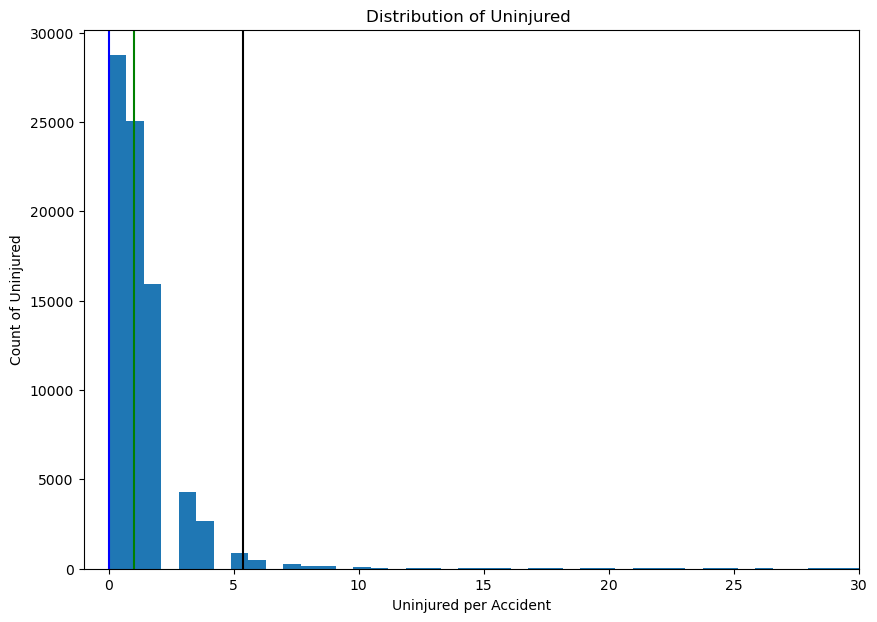

In [50]:
# Statistical analysis of Total.Uninjured before dropping na values

def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = ad_5[column]
    mean = data.mean()
    median = data.median()
    mode = data.mode().iloc[0]
    # Set up plot
    fig, ax = plt.subplots(figsize=(10,7))
    # Plot histogram
    ax.hist(data, bins=1000)
    # Plot vertical line
    ax.axvline(mean, color="black")
    ax.axvline(median, color='green')
    ax.axvline(mode, color='blue')
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xlim(xmin=-1, xmax=30)
plot_histogram(
    ad_5,
    "Total.Uninjured",
    "Distribution of Uninjured ",
    'Uninjured per Accident',
    "Count of Uninjured"
)

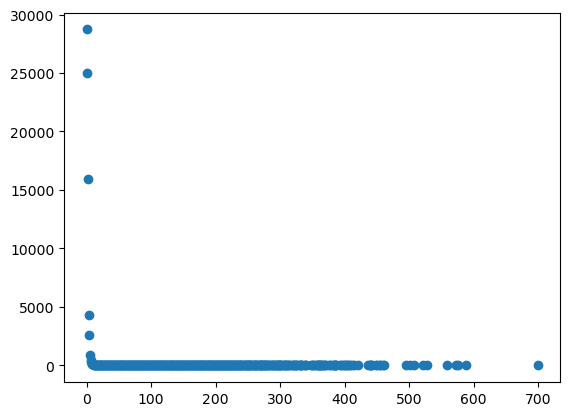

In [63]:
ad_5['Total.Uninjured'].value_counts()

# create index & values

tu_index = ad_5['Total.Uninjured'].value_counts().index
tu_values = ad_5['Total.Uninjured'].value_counts().values

plt.scatter(tu_index,tu_values)

In [57]:
# There are so many outliers that it makes sense to evaluate and drop them

total_uninjured = ad_5['Total.Uninjured']
q75, q25 = np.percentile(total_uninjured, [75, 25])
iqr = q75 - q25
iqr

2.0

In [53]:
ad_5.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')